# Intro to Plotting

### Sneak peak:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 10
sns.set(style='ticks', context='talk')
plt.rcParams['figure.figsize'] = (12, 6)

In [2]:
df = pd.read_csv('data/beer_subset.csv.gz', parse_dates=['time'], compression='gzip')
review_cols = [c for c in df.columns if c[0:6] == 'review']
df.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


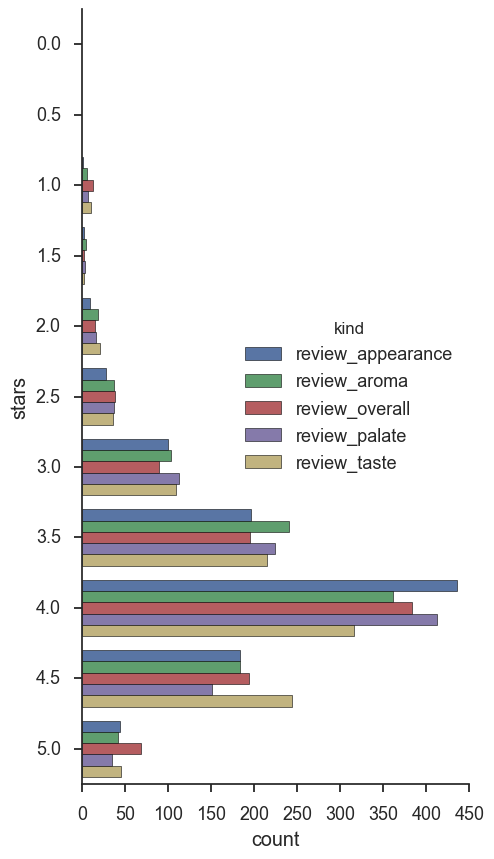

In [3]:
fig, ax = plt.subplots(figsize=(5, 10))
sns.countplot(hue='kind', y='stars', data=(df[review_cols]
                                           .stack()
                                           .rename_axis(['record', 'kind'])
                                           .rename('stars')
                                           .reset_index()),
              ax=ax, order=np.arange(0, 5.5, .5))
sns.despine()

## Matplotlib

- Tons of features
- "Low-level" library

Check out [the tutorials](http://matplotlib.org/users/beginner.html)

In [4]:
from IPython import display
display.HTML('<iframe src="http://matplotlib.org/users/beginner.html" height=500 width=1024>')

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

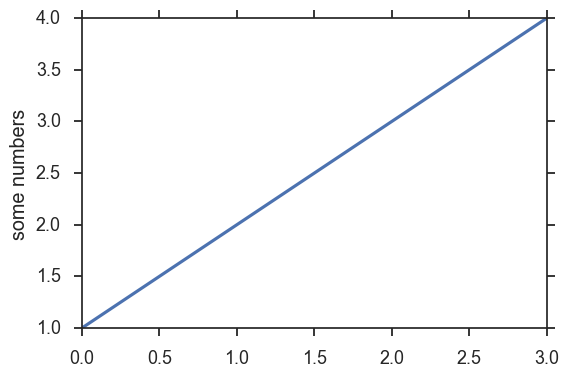

In [6]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

A single series is interpreted as y values, so x is just the index...

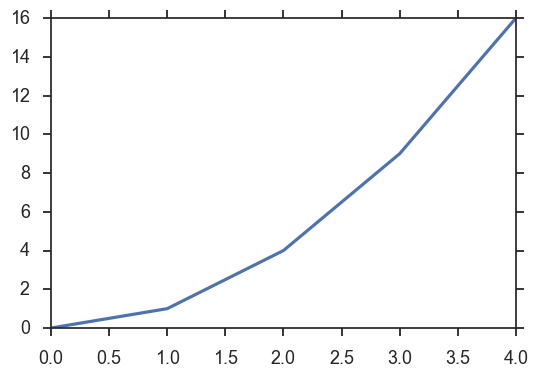

In [7]:
x = np.arange(5)
y = x**2
plt.plot(x, y)

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. 

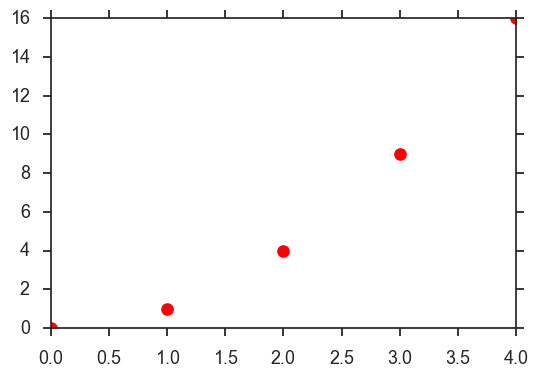

In [8]:
plt.plot(x, y, 'ro')

To work on plots in more detail, it's useful to store the "axis" object

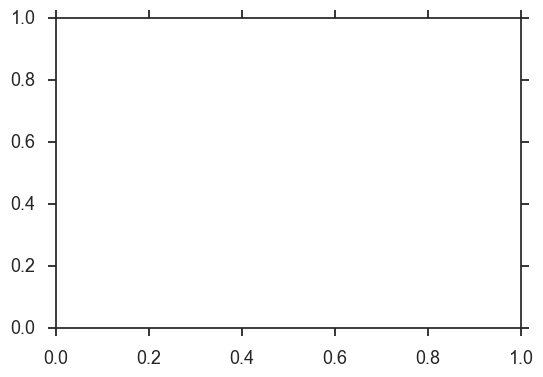

In [9]:
fig, ax = plt.subplots()

In [10]:
ax.

SyntaxError: invalid syntax (<ipython-input-10-8245e8db10a3>, line 1)

In [11]:
ax.plot(x, y, 'ro')

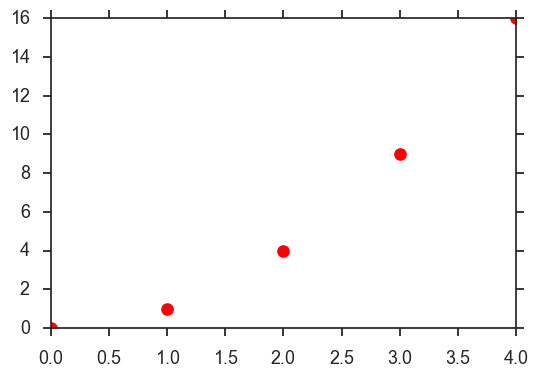

In [12]:
fig

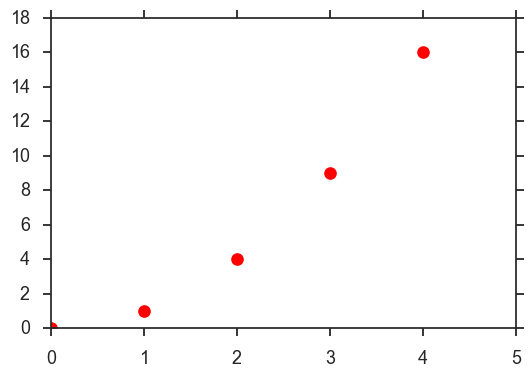

In [13]:
ax.set_xlim([0,5])
ax.set_ylim([0,18])
fig

Lots of `keyword` properties...

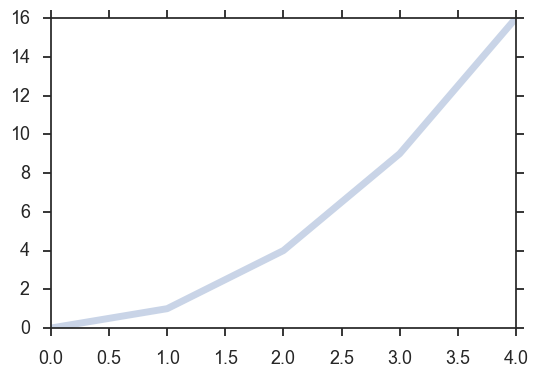

In [14]:
fig, ax = plt.subplots()
ax.plot(x, y, linewidth=5, alpha=.3)

#### Overlaying plots

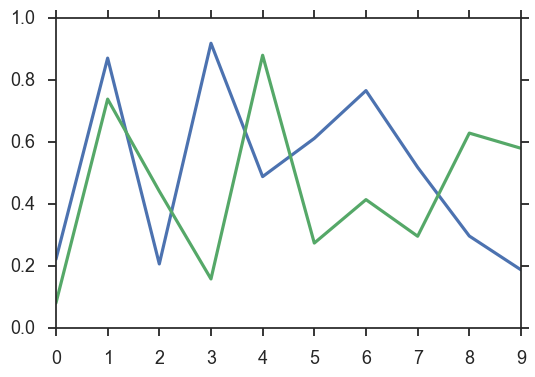

In [15]:
np.random.seed(5)
fig, ax = plt.subplots()
ax.plot(np.arange(10), np.random.rand(10))
ax.plot(np.arange(10), np.random.rand(10))

#### Multiple plots

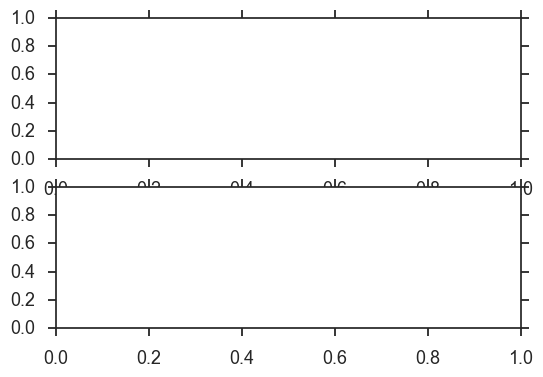

In [16]:
fig, ax = plt.subplots(nrows=2)

In [17]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x118a3e1d0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118b92358>], dtype=object)

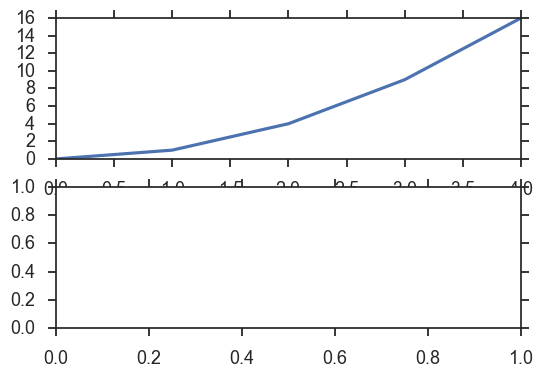

In [18]:
ax[0].plot(x, y)
fig

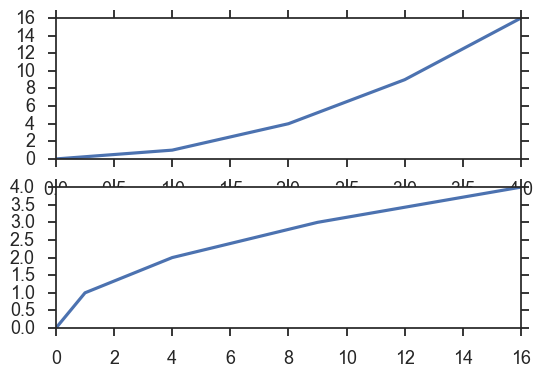

In [19]:
ax[1].plot(y, x)
fig

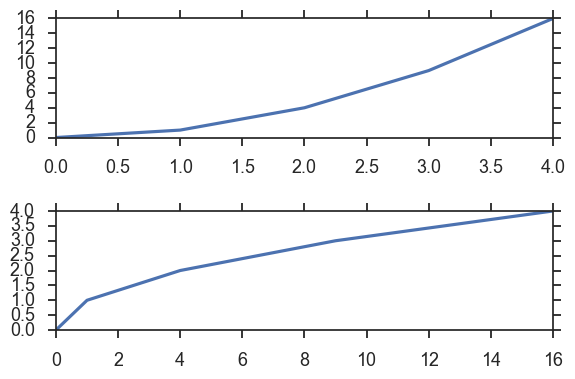

In [20]:
fig.tight_layout()
fig

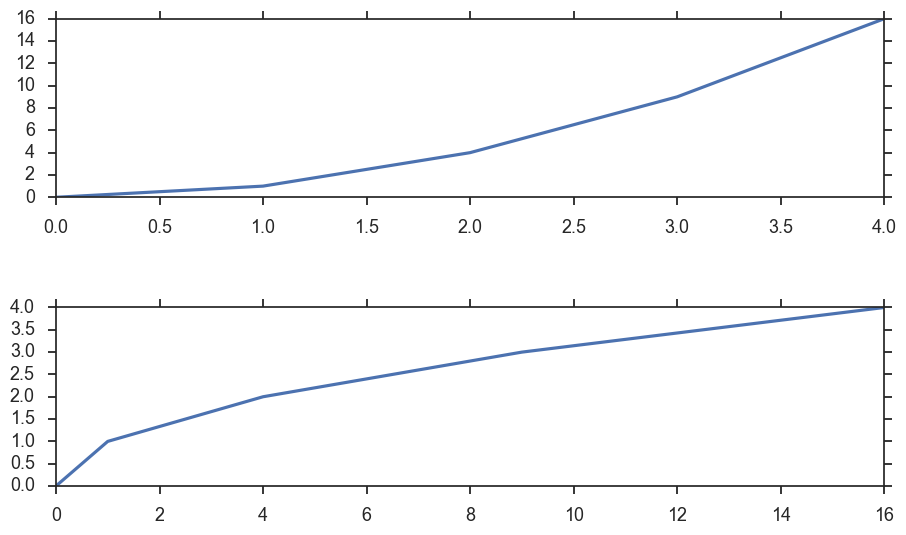

In [21]:
fig.set_size_inches(10,6)
fig

#### Types of axes

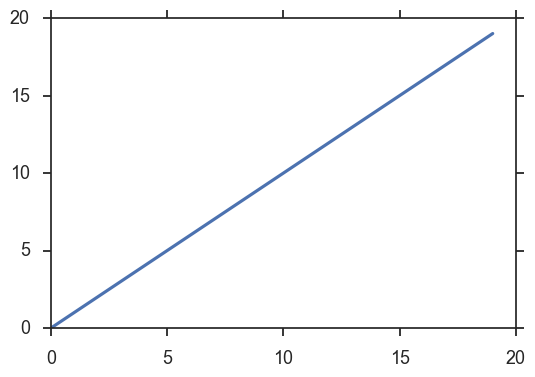

In [22]:
fig, ax = plt.subplots()
ax.plot(np.arange(20))

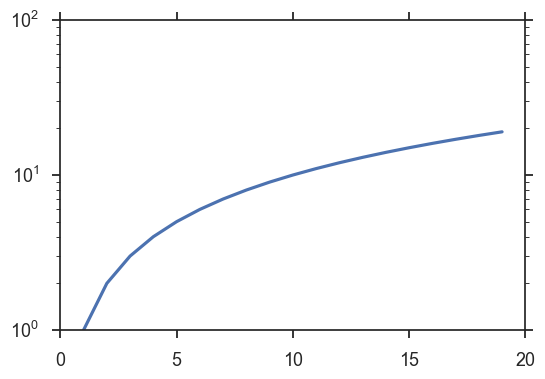

In [23]:
ax.set_yscale('log')
fig

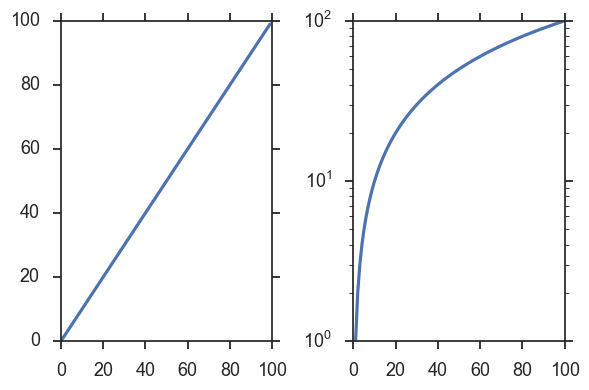

In [24]:
fig, ax = plt.subplots(ncols=2)
ax[0].plot(np.arange(100))
ax[1].plot(np.arange(100))
ax[1].set_yscale('log')
fig.tight_layout()

The best way to learn is [the gallery](http://matplotlib.org/gallery.html)

In [25]:
display.HTML('<iframe src="http://matplotlib.org/gallery.html" height=500 width=1024>')

### A handful of examples

Scatter plots and "bubble charts"

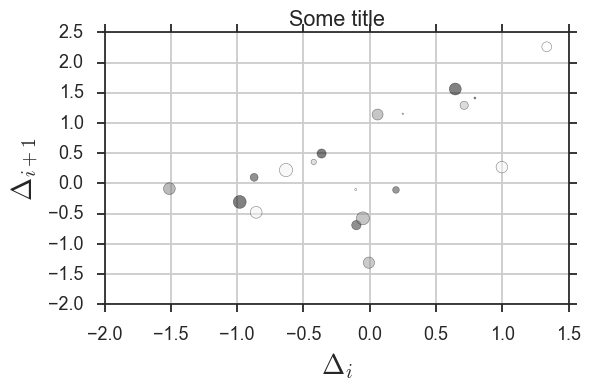

In [26]:
fig, ax = plt.subplots()

n = 20
x = np.random.normal(size=n)
y = np.random.normal(size=n)
c = np.random.uniform(size=n)
s = np.random.randint(100, size=n)
ax.scatter(x, y, c=c, s=s, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=20)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=20)
ax.set_title('Some title')

ax.grid(True)
fig.tight_layout()

#### Bar charts

In [73]:
people = ['Annie', 'Brian', 'Chelsea', 'Derek', 'Elise']
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

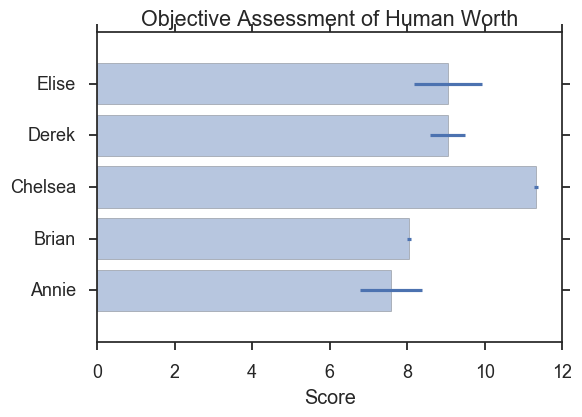

In [74]:
fig, ax = plt.subplots()
ax.barh(np.arange(len(people)), performance, xerr=error, align='center', alpha=0.4)
ax.set_yticks(np.arange(len(people)))
ax.set_yticklabels(people)
ax.set_xlabel('Score')
ax.set_title('Objective Assessment of Human Worth')

# Plotting with Pandas

matplotlib is a relatively *low-level* plotting package, relative to others. It makes very few assumptions about what constitutes good layout (by design), but has a lot of flexiblility to allow the user to completely customize the look of the output.

On the other hand, Pandas includes methods for DataFrame and Series objects that are relatively high-level, and that make reasonable assumptions about how the plot should look.

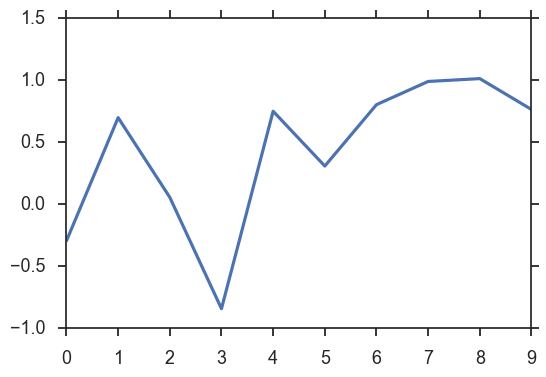

In [27]:
normals = pd.Series(np.random.normal(size=10))
normals.plot()

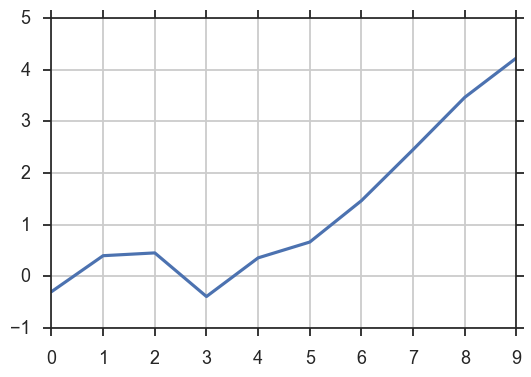

In [28]:
normals.cumsum().plot(grid=True)

Similarly, for a DataFrame:

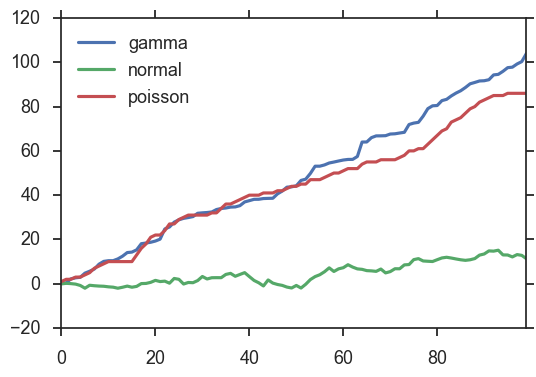

In [29]:
variables = pd.DataFrame({'normal': np.random.normal(size=100), 
                          'gamma': np.random.gamma(1, size=100), 
                          'poisson': np.random.poisson(size=100)})
variables.cumsum(0).plot()

All Pandas plotting commands return `matplotlib` `axis` objects:

matplotlib.axes._subplots.AxesSubplot

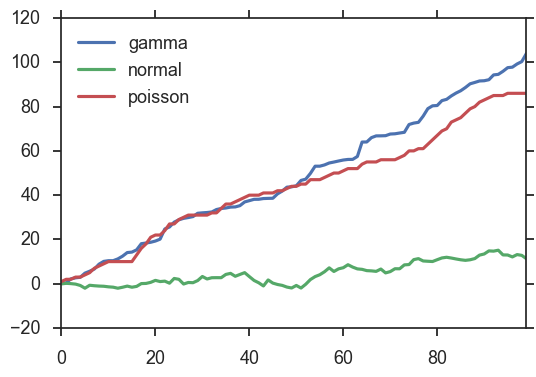

In [30]:
ax = variables.cumsum(0).plot()
type(ax)

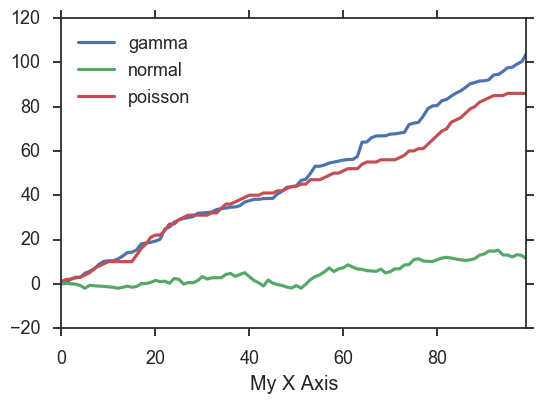

In [31]:
ax.set_xlabel('My X Axis')
ax.figure

In [32]:
ax.vlines?

In [33]:
ax.get_ylim()

(-20.0, 120.0)

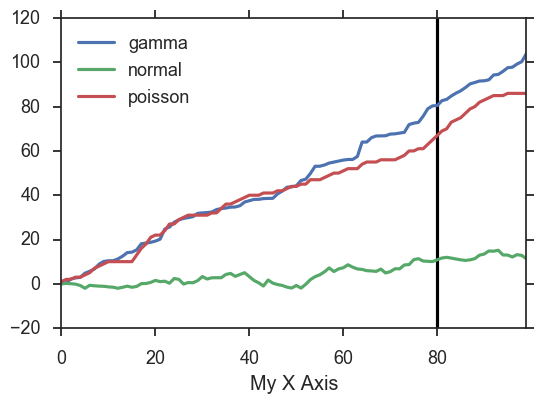

In [34]:
ax.vlines(80, *ax.get_ylim())
ax.figure

As an illustration of the high-level nature of Pandas plots, we can split multiple series into subplots with a single argument for `plot`:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x119b29048>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x11a2e0d30>], dtype=object)

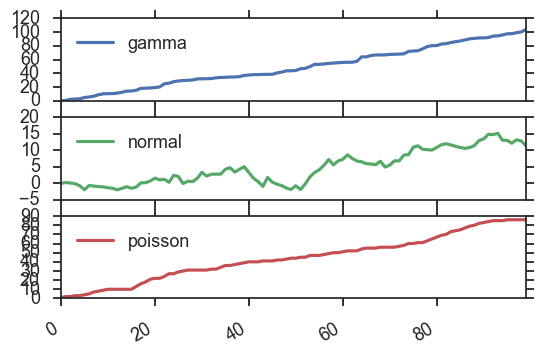

In [35]:
variables.cumsum(0).plot(subplots=True)

Or, we could use a secondary y-axis:

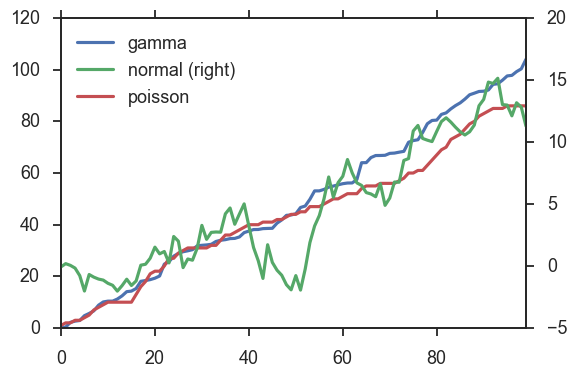

In [36]:
variables.cumsum(0).plot(secondary_y='normal', grid=False)

(Note that ["friends don't let friends use two y-axes"](https://kieranhealy.org/blog/archives/2016/01/16/two-y-axes/), but we're just showing some examples here...)

If we would like a little more control, we can use matplotlib's `subplots` function directly, and manually assign plots to its axes:

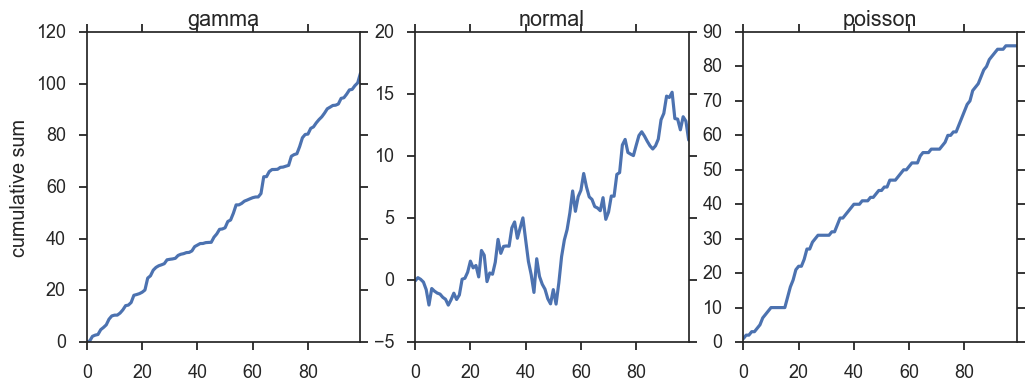

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
for i,var in enumerate(variables.columns):
    variables[var].cumsum(0).plot(ax=ax[i], title=var)
ax[0].set_ylabel('cumulative sum')

### Bar plots

Bar plots are useful for displaying and comparing measurable quantities, such as counts or volumes. In Pandas, we just use the `plot` method with a `kind='bar'` argument.

For this series of examples, let's load up the Titanic dataset:

In [38]:
titanic = pd.read_excel("data/titanic.xls", "titanic")
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


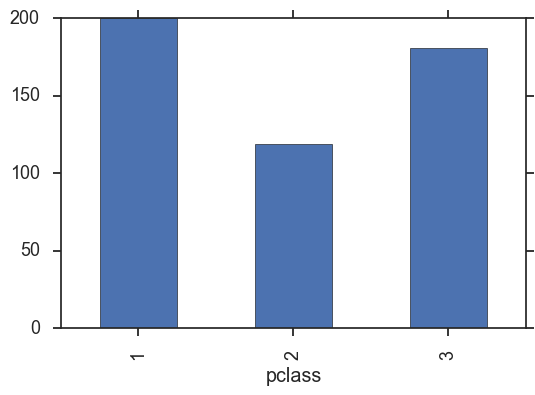

In [39]:
titanic.groupby('pclass')['survived'].sum().plot(kind='bar')

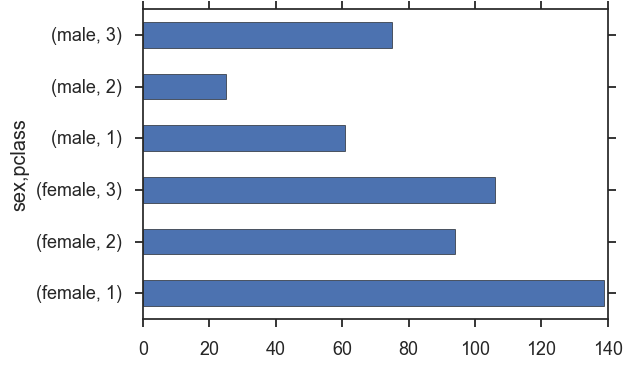

In [40]:
titanic.groupby(['sex','pclass'])['survived'].sum().plot(kind='barh')

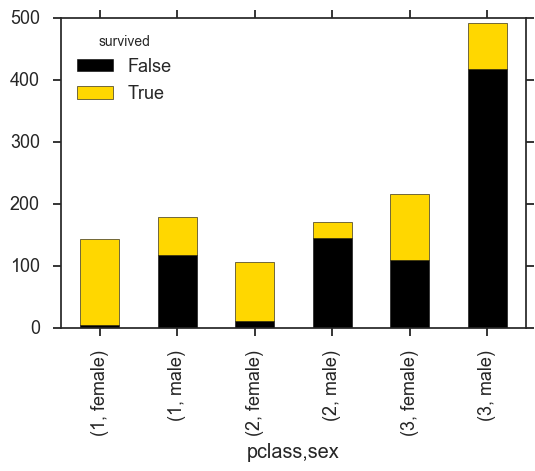

In [41]:
death_counts = pd.crosstab([titanic['pclass'], titanic['sex']], titanic['survived'].astype(bool))
death_counts.plot(kind='bar', stacked=True, color=['black','gold'], grid=False)

Or if we wanted to see survival _rate_ instead:

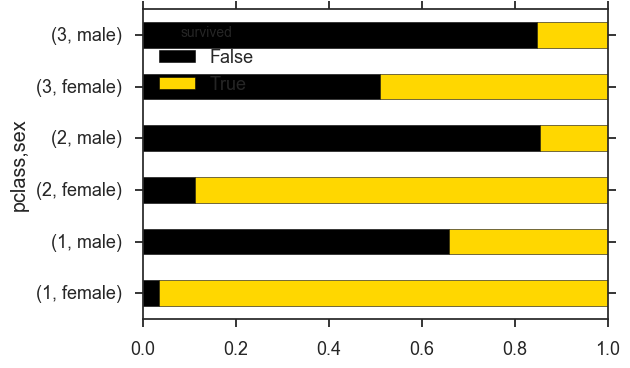

In [42]:
death_counts.div(death_counts.sum(1).astype(float), axis=0).plot(kind='barh', stacked=True, color=['black','gold'])

## Histograms

Frequently it is useful to look at the *distribution* of data before you analyze it. Histograms are a sort of bar graph that displays relative frequencies of data values; hence, the y-axis is always some measure of frequency. This can either be raw counts of values or scaled proportions.

For instance, fare distributions aboard the titanic:

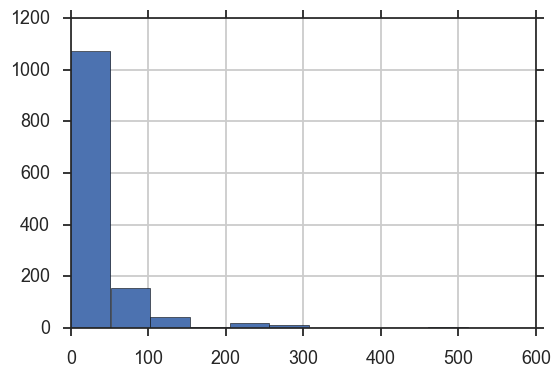

In [43]:
titanic['fare'].hist()

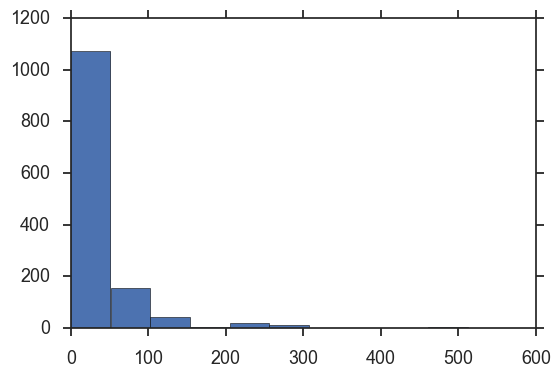

In [44]:
titanic['fare'].hist(grid=False)

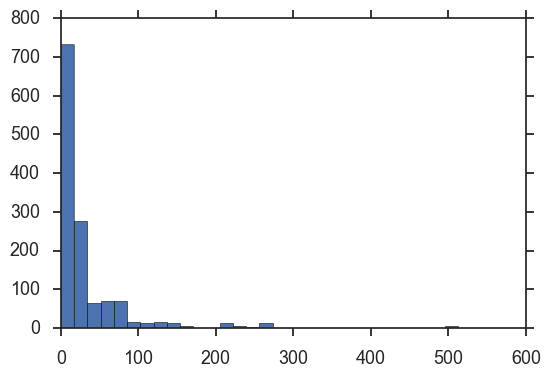

In [45]:
titanic['fare'].hist(grid=False, bins=30)

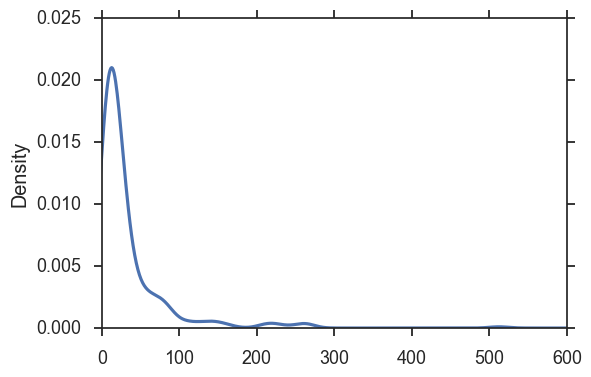

In [46]:
titanic['fare'].dropna().plot(kind='kde', xlim=(0,600))

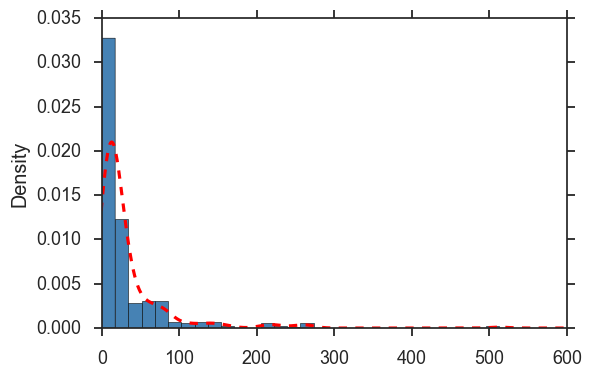

In [47]:
titanic['fare'].hist(bins=30, normed=True, color='steelblue')
titanic['fare'].dropna().plot(kind='kde', xlim=(0,600), style='r--')

### Boxplots

A different way of visualizing the distribution of data is the boxplot, which is a display of common quantiles; these are typically the quartiles and the lower and upper 5 percent values.

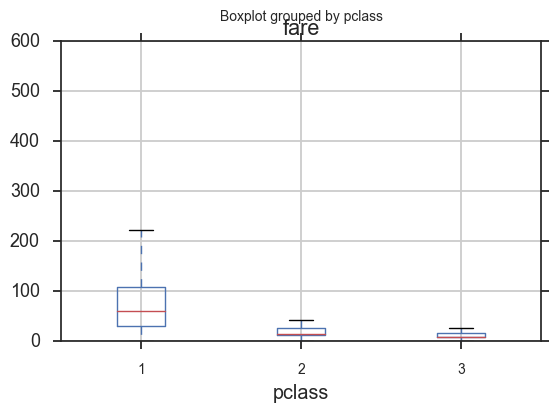

In [48]:
titanic.boxplot(column='fare', by='pclass')

One way to add additional information to a boxplot is to overlay the actual data; this is generally most suitable with small- or moderate-sized data series.

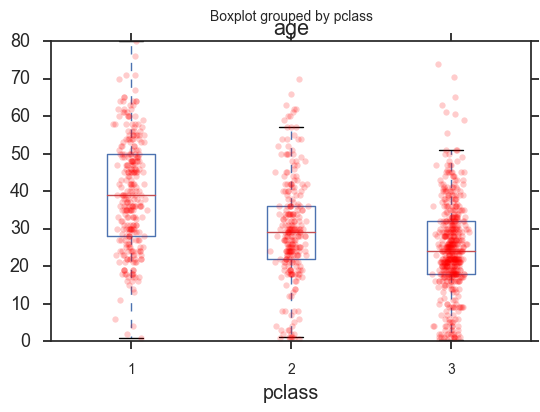

In [49]:
bp = titanic.boxplot(column='age', by='pclass', grid=False)
for i in [1,2,3]:
    y = titanic.age[titanic.pclass==i].dropna()
    # Add some random "jitter" to the x-axis
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y.values, 'r.', alpha=0.2)

### Scatter plots

In [50]:
df.head()

,abv,beer_id,brewer_id,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,profile_name,review_taste,text,time
0,7.0,2511,287,Bell's Cherry Stout,American Stout,4.5,4.0,4.5,4.0,blaheath,4.5,Batch 8144\tPitch black in color with a 1/2 f...,2009-10-05 21:31:48
1,5.7,19736,9790,Duck-Rabbit Porter,American Porter,4.5,4.0,4.5,4.0,GJ40,4.0,Sampled from a 12oz bottle in a standard pint...,2009-10-05 21:32:09
2,4.8,11098,3182,Fürstenberg Premium Pilsener,German Pilsener,4.0,3.0,3.0,3.0,biegaman,3.5,Haystack yellow with an energetic group of bu...,2009-10-05 21:32:13
3,9.5,28577,3818,Unearthly (Imperial India Pale Ale),American Double / Imperial IPA,4.0,4.0,4.0,4.0,nick76,4.0,"The aroma has pine, wood, citrus, caramel, an...",2009-10-05 21:32:37
4,5.8,398,119,Wolaver's Pale Ale,American Pale Ale (APA),4.0,3.0,4.0,3.5,champ103,3.0,A: Pours a slightly hazy golden/orange color....,2009-10-05 21:33:14


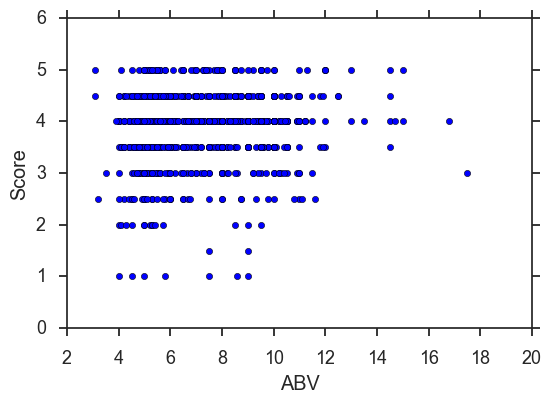

In [51]:
plt.scatter(df['abv'], df['review_overall'])
plt.xlabel('ABV')
plt.ylabel('Score')

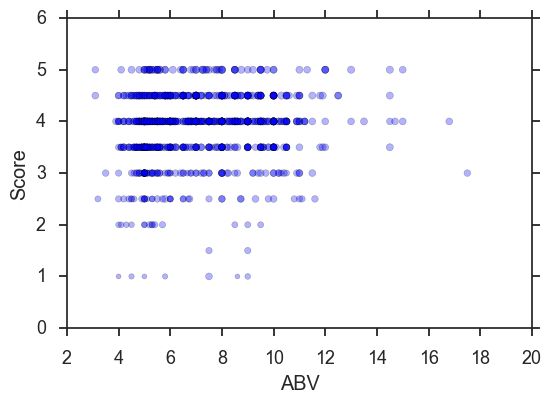

In [52]:
plt.scatter(df['abv'], df['review_overall'], s=np.sqrt(df['review_palate']*150), alpha=0.3)
plt.xlabel('ABV')
plt.ylabel('Score')

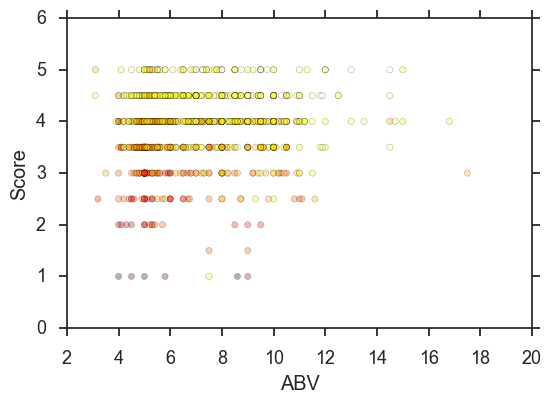

In [53]:
plt.scatter(df['abv'], df['review_overall'], alpha=0.3, c=df.review_palate, cmap='hot')
plt.xlabel('ABV')
plt.ylabel('Score')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b56afd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11c118908>]], dtype=object)

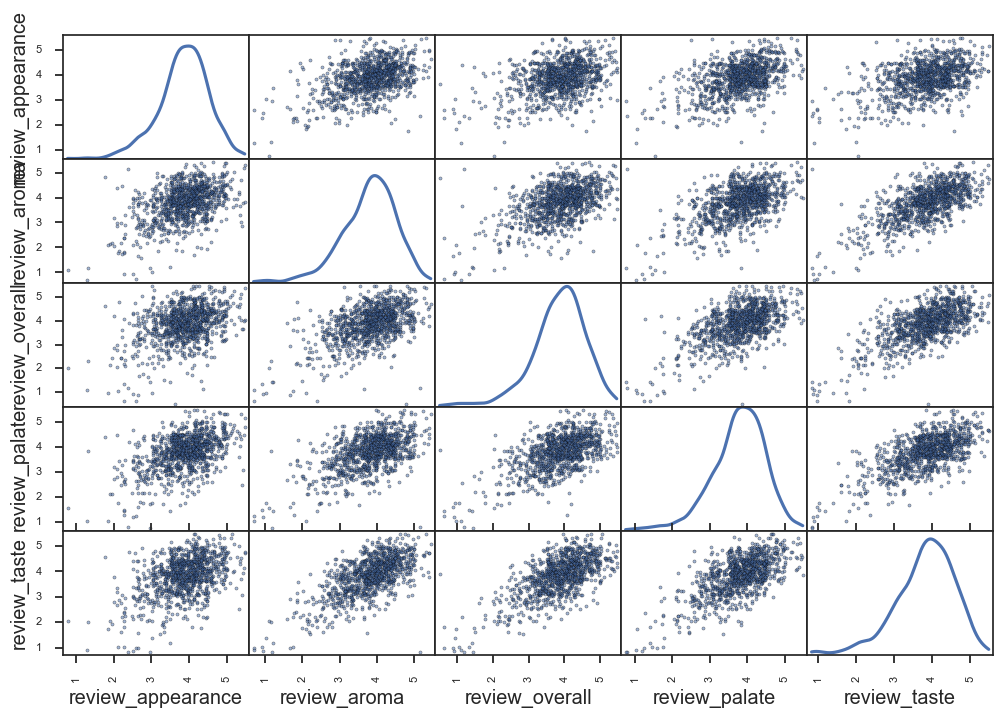

In [54]:
jittered_df = df[review_cols] + (np.random.rand(*df[review_cols].shape) - 0.5)
pd.scatter_matrix(jittered_df, figsize=(12,8), diagonal='kde', )

### Lots more info on Pandas plotting in [the docs](http://pandas.pydata.org/pandas-docs/stable/visualization.html)

## [Seaborn](http://seaborn.pydata.org/)

High-level interface for `matplotlib`

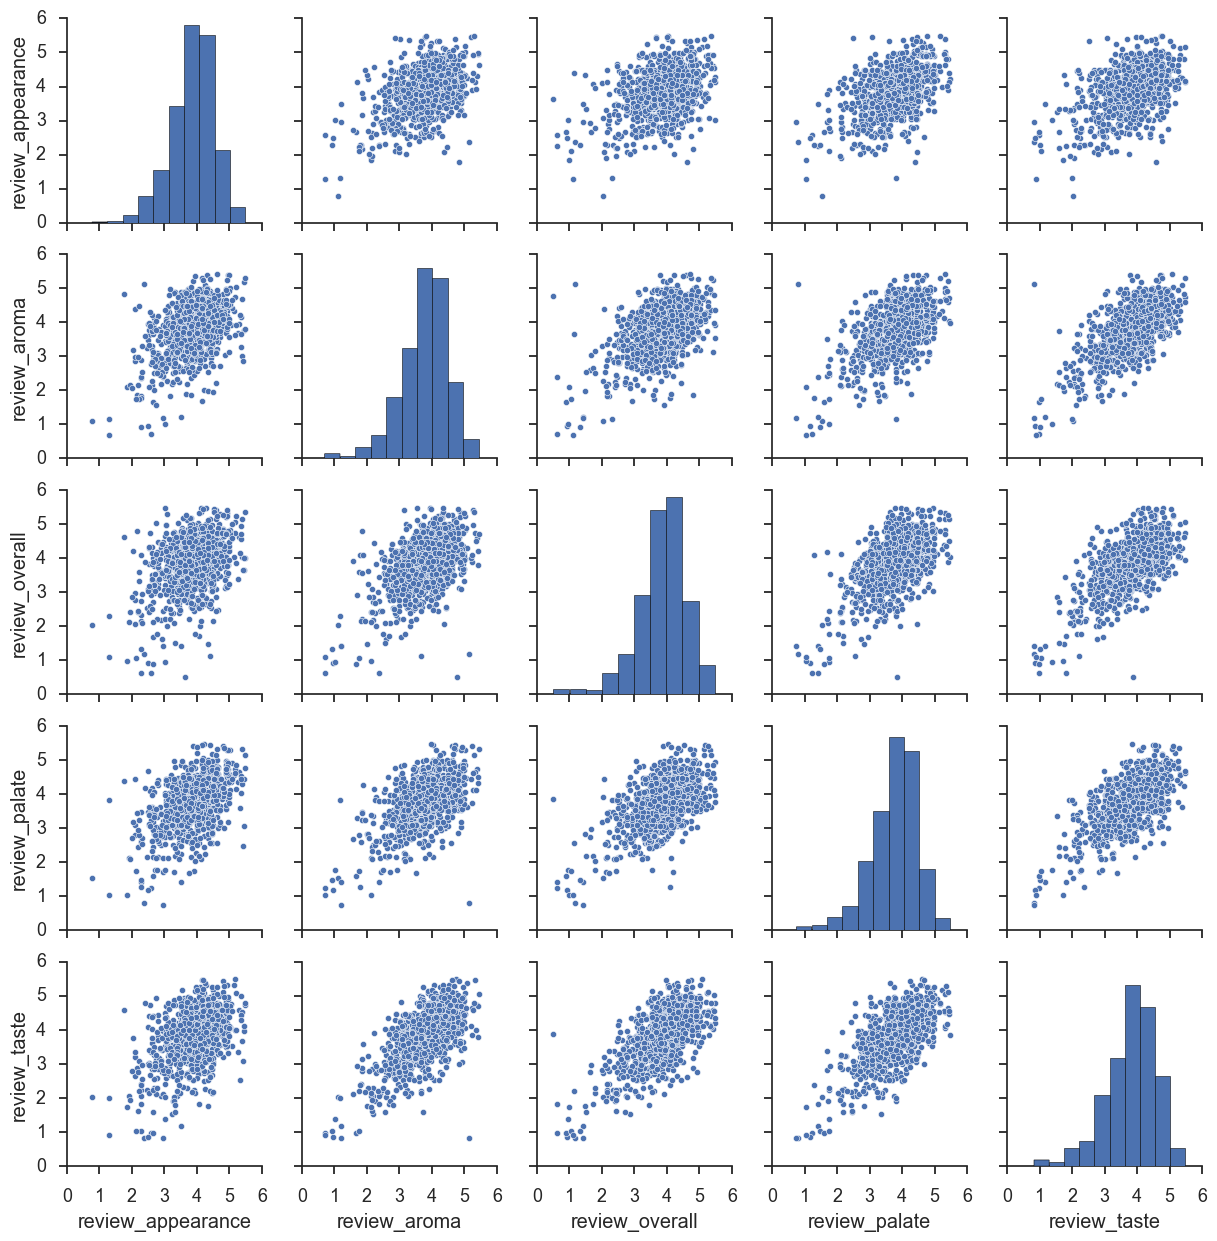

In [55]:
sns.pairplot(jittered_df[review_cols])

In [56]:
sns.pairplot?

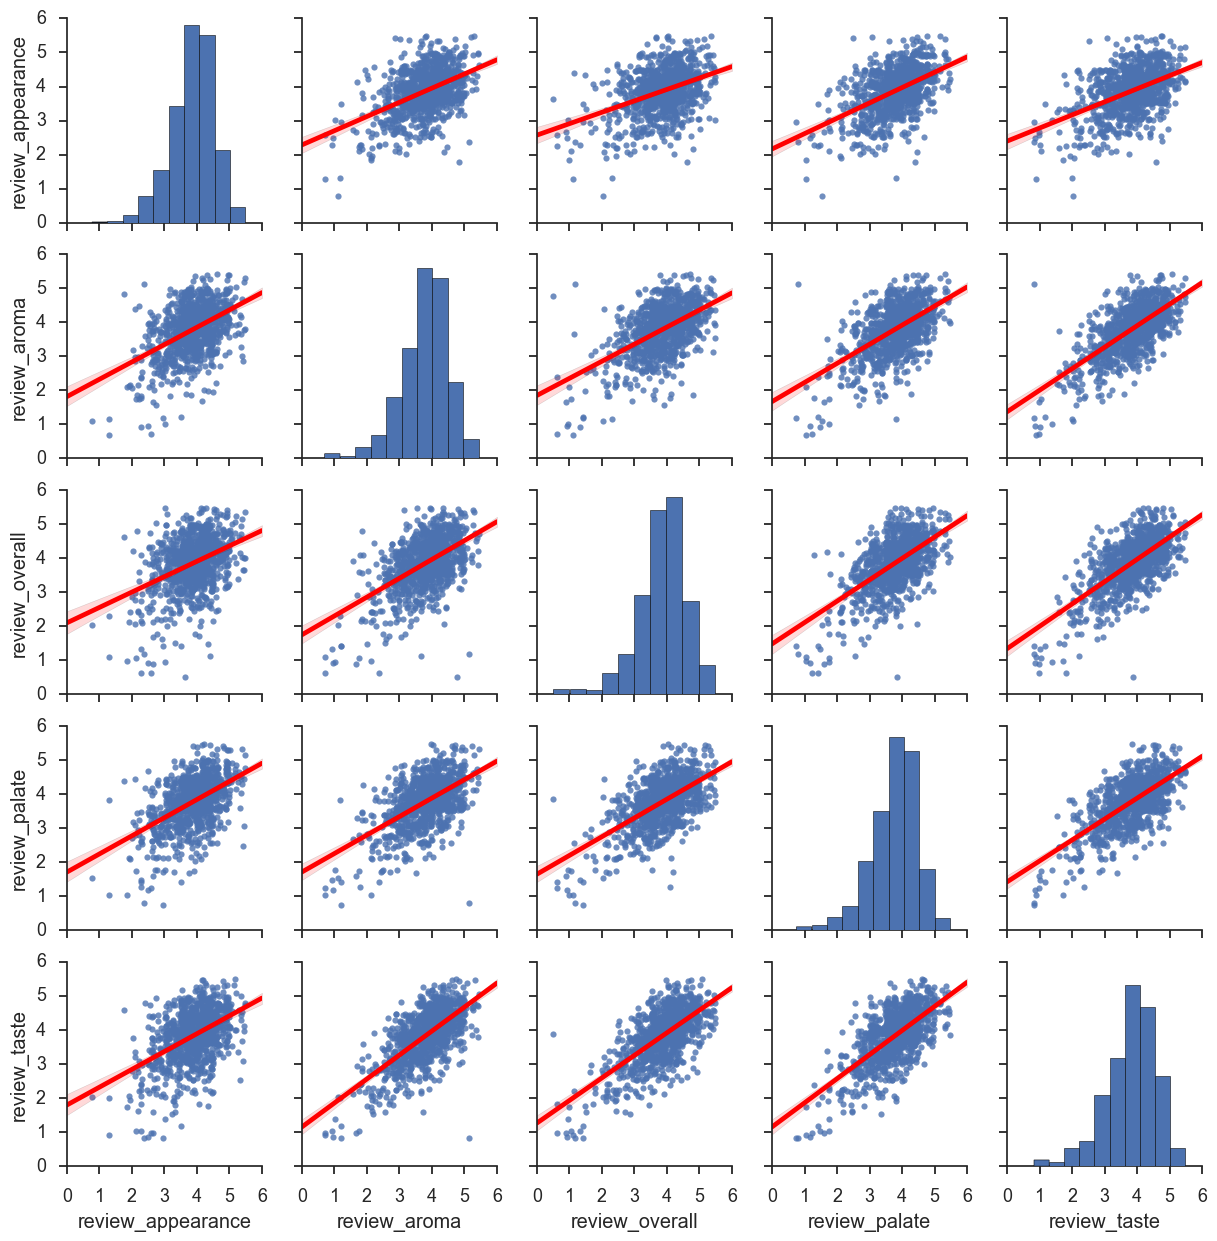

In [57]:
sns.pairplot(jittered_df[review_cols], kind='reg', 
             plot_kws={'line_kws':{'color': 'red'}})

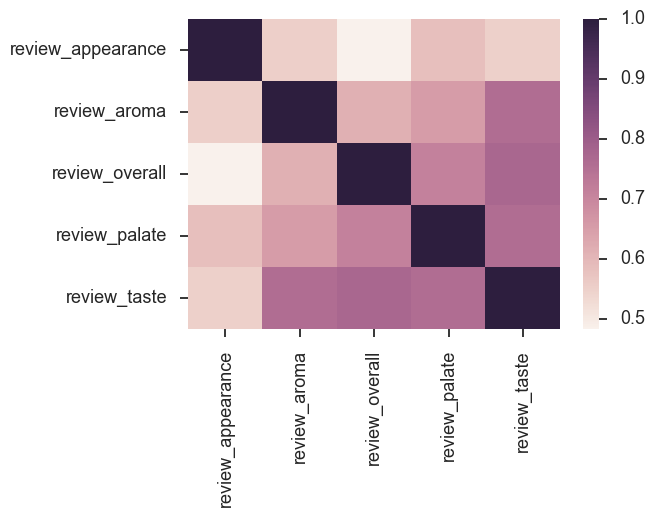

In [58]:
sns.heatmap(df[review_cols].corr())

/Users/kfor/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


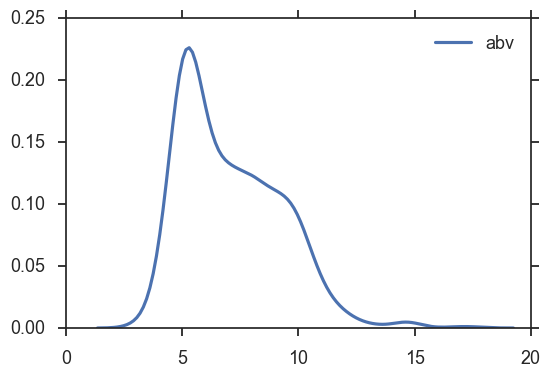

In [59]:
sns.kdeplot(df['abv'])

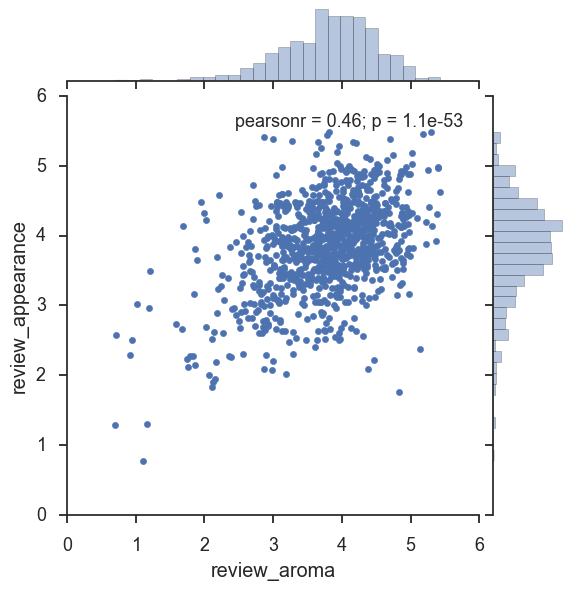

In [60]:
sns.jointplot(jittered_df['review_aroma'], jittered_df['review_appearance'])

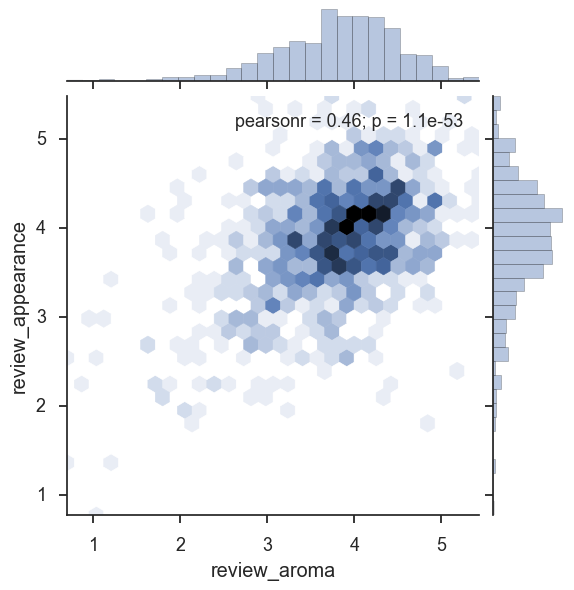

In [61]:
sns.jointplot(jittered_df['review_aroma'], jittered_df['review_appearance'],
              kind='hexbin')

In [62]:
titanic[['age','fare','pclass','survived']].dropna().head()

,age,fare,pclass,survived
0,29.0000,211.3375,1,1
1,0.9167,151.5500,1,1
2,2.0000,151.5500,1,0
3,30.0000,151.5500,1,0
4,25.0000,151.5500,1,0


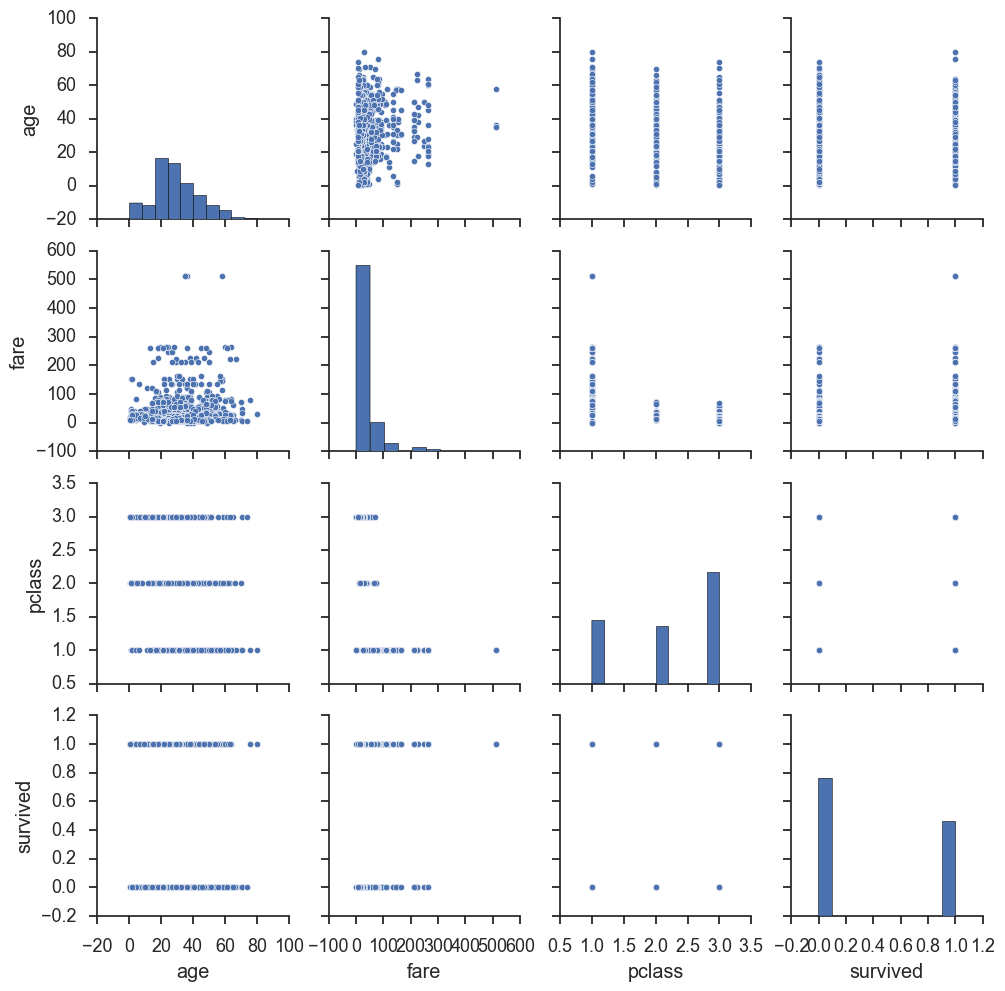

In [63]:
sns.pairplot(titanic[['age','fare','pclass','survived']].dropna())

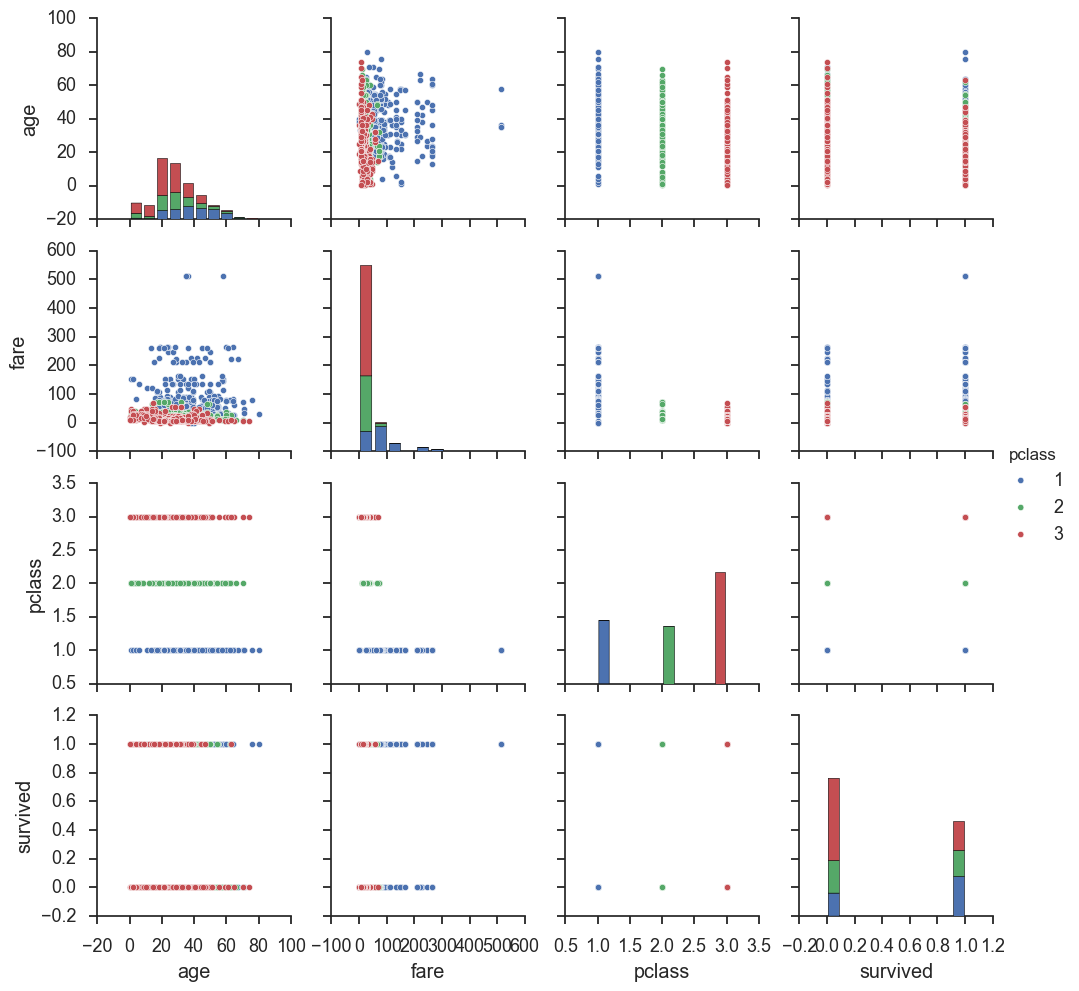

In [64]:
sns.pairplot(titanic[['age','fare','pclass','survived']].dropna(),
            hue='pclass')

Seaborn also returns `matplotlib` `axis` objects...

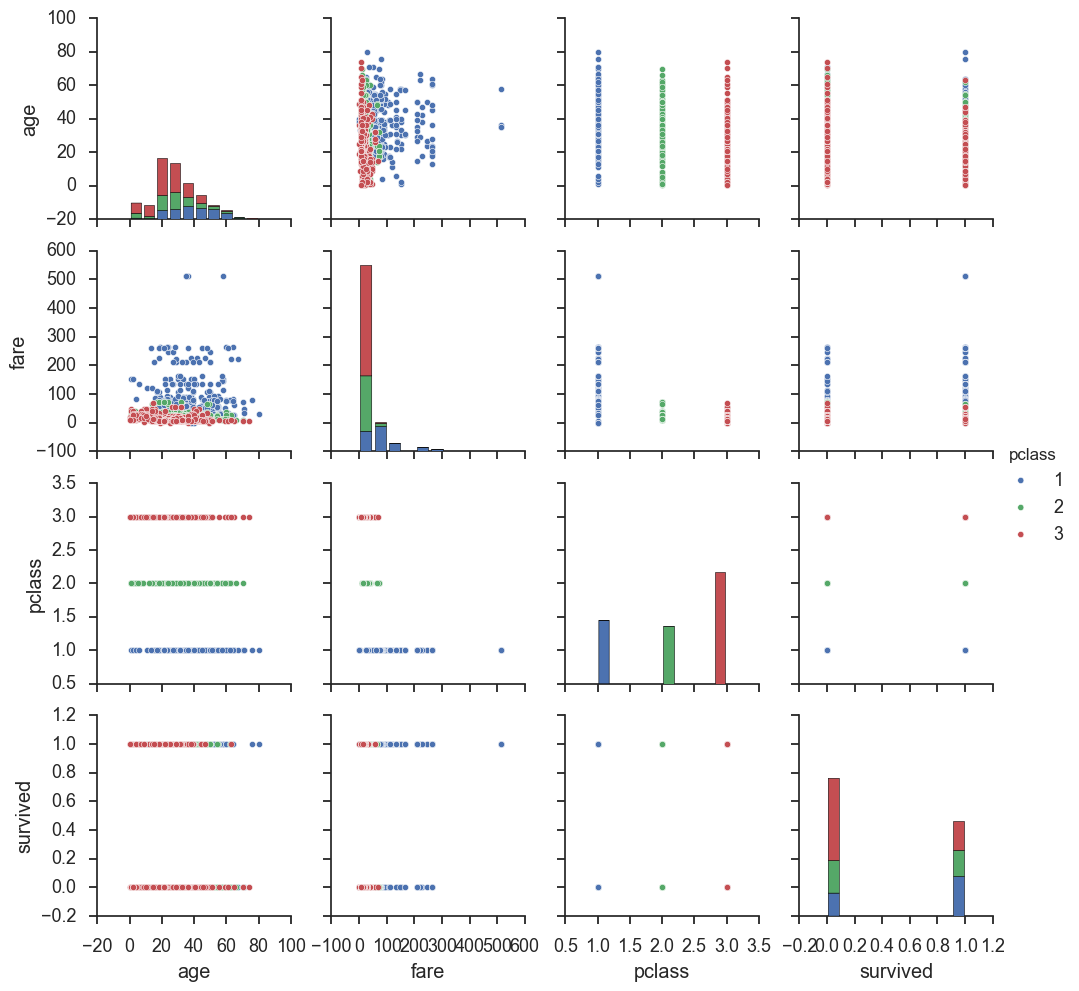

In [65]:
ax = sns.pairplot(titanic[['age','fare','pclass','survived']].dropna(),
            hue='pclass')

In [66]:
ax.axes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1251d5278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x125d3d5c0>]], dtype=object)

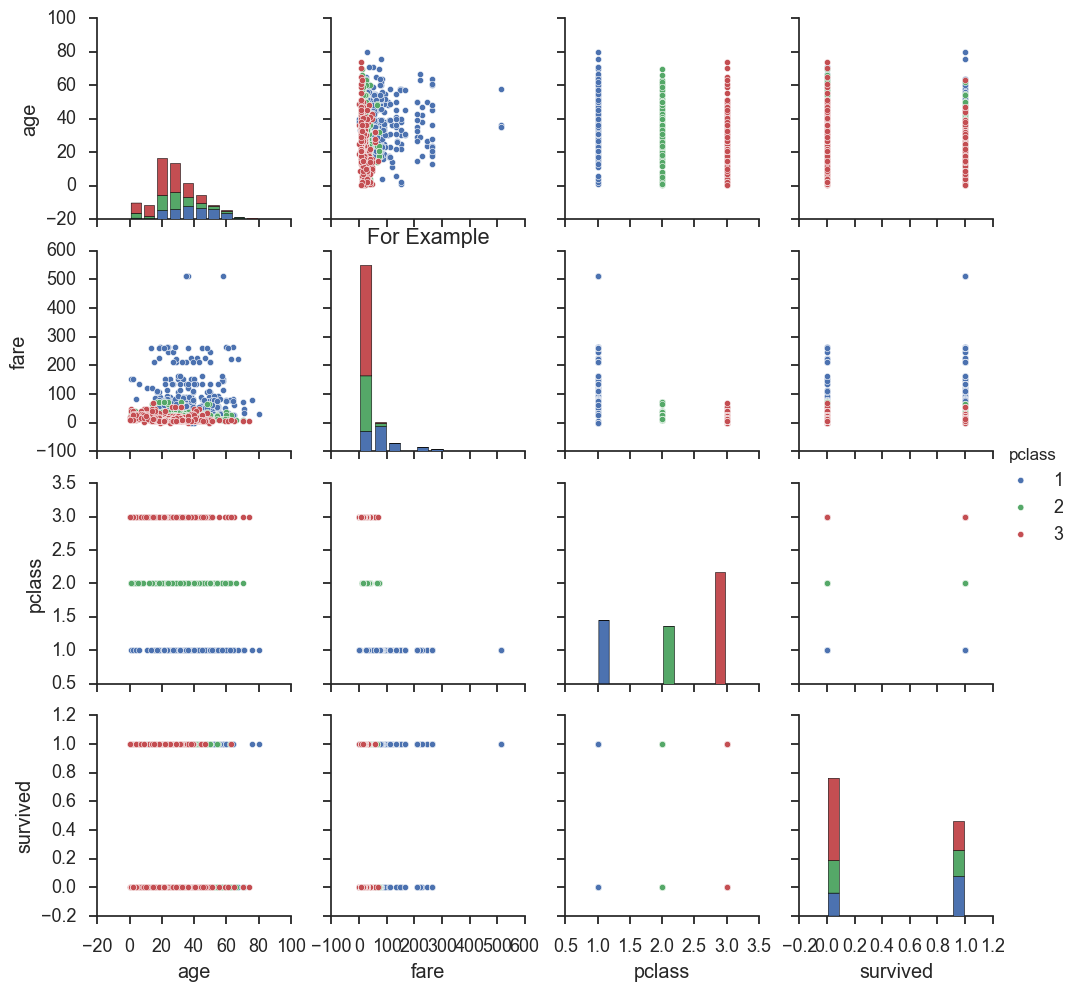

In [67]:
ax.axes[1,1].set_title('For Example')
ax.fig

### [ggplot](http://ggplot.yhathq.com/)

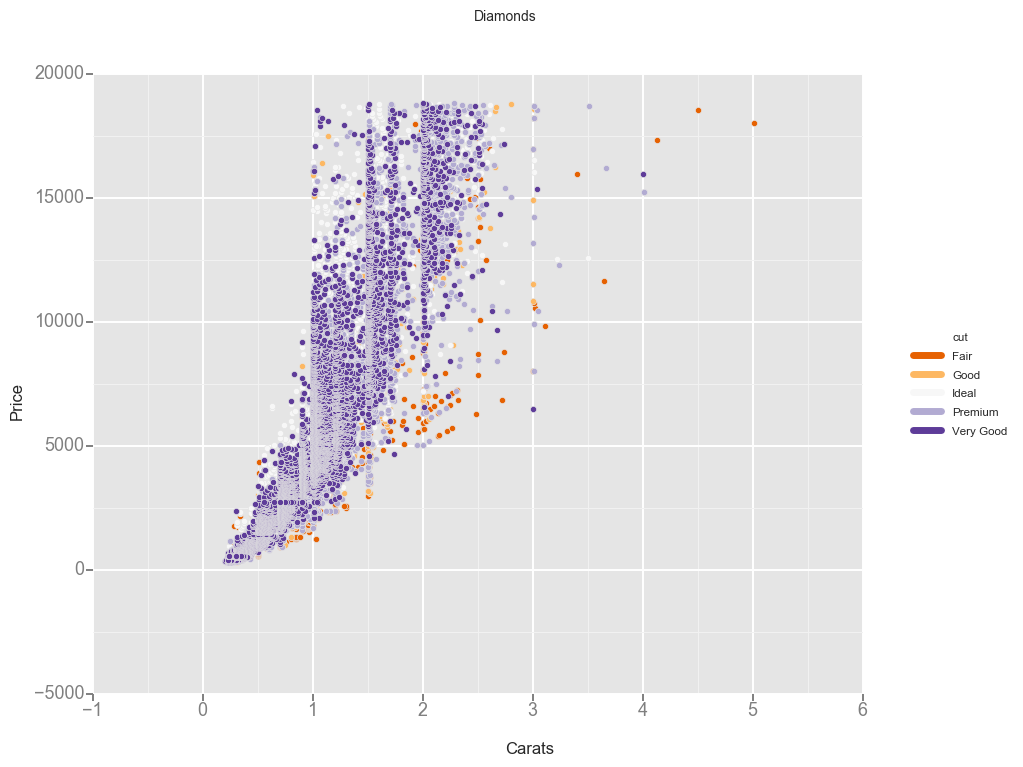

<ggplot: (309965197)>

In [68]:
from ggplot import *
ggplot(diamonds, aes(x='carat', y='price', color='cut')) +\
    geom_point() +\
    scale_color_brewer(type='diverging', palette=4) +\
    xlab("Carats") + ylab("Price") + ggtitle("Diamonds")

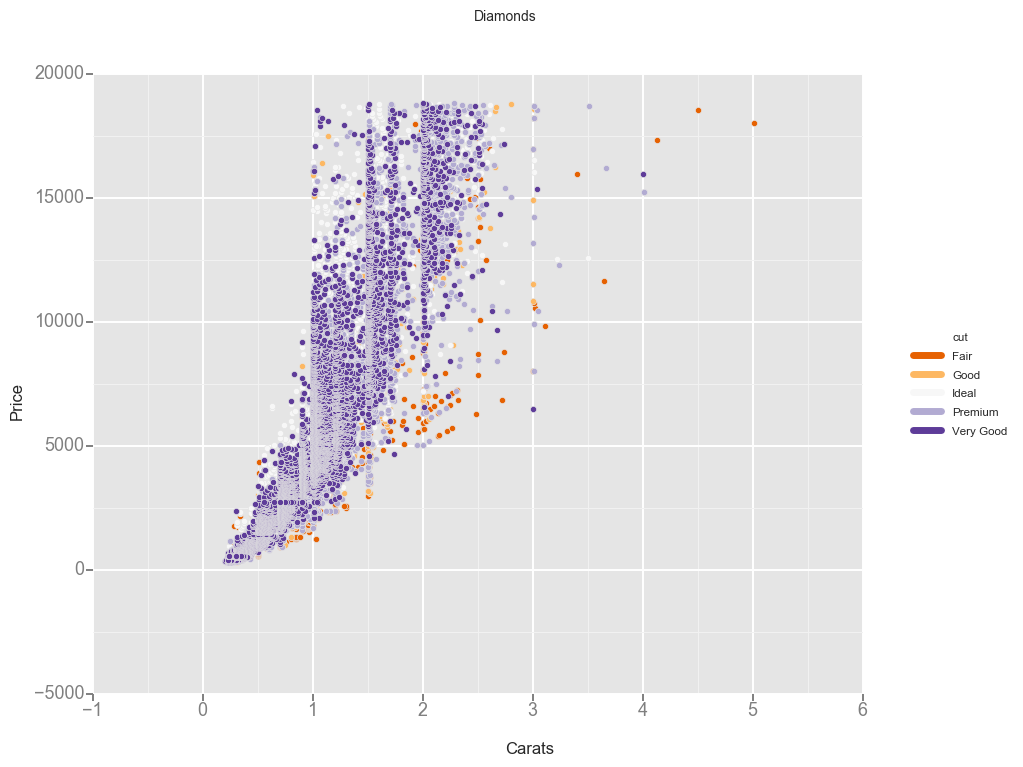

<ggplot: (309965281)>

In [69]:
p = ggplot(diamonds, aes(x='carat', y='price', color='cut'))
p += geom_point()
p += scale_color_brewer(type='diverging', palette=4)
p += xlab("Carats") 
p += ylab("Price") 
p += ggtitle("Diamonds")
p

In [70]:
p.fig.axes

### [Bokeh](http://bokeh.pydata.org/)

In [71]:
from bokeh.io import push_notebook, show, output_notebook
from bokeh.layouts import row
from bokeh.plotting import figure
from bokeh.palettes import brewer
output_notebook()

N = 20
categories = ['y' + str(x) for x in range(10)]
data = {}
data['x'] = np.arange(N)
for cat in categories:
    data[cat] = np.random.randint(10, 100, size=N)

df = pd.DataFrame(data)
df = df.set_index(['x'])

def stacked(df, categories):
    areas = dict()
    last = np.zeros(len(df[categories[0]]))
    for cat in categories:
        next = last + df[cat]
        areas[cat] = np.hstack((last[::-1], next))
        last = next
    return areas

areas = stacked(df, categories)

colors = brewer["Spectral"][len(areas)]

x2 = np.hstack((data['x'][::-1], data['x']))

p = figure(x_range=(0, 19), y_range=(0, 800))
p.grid.minor_grid_line_color = '#eeeeee'

p.patches([x2] * len(areas), [areas[cat] for cat in categories],
          color=colors, alpha=0.8, line_color=None)

show(p, notebook_handle=True)
push_notebook()

Loading BokehJS ...

## So many plotting libraries!

In [72]:
display.HTML('<iframe src="https://dansaber.wordpress.com/2016/10/02/a-dramatic-tour-through-pythons-data-visualization-landscape-including-ggplot-and-altair/" width=1024 height=500>')

## Exercise 6 - "Choose your own adventure" workshop

1. Grab the data of your choice
    - Can't think of anything? [GHDx](http://ghdx.healthdata.org/)
2. Load it into a Pandas `DataFrame`
3. Compute some summary statistics
4. Create some cool plots

## References

Slide materials inspired by and adapted from [Chris Fonnesbeck](https://github.com/fonnesbeck/statistical-analysis-python-tutorial) and [Tom Augspurger](https://github.com/TomAugspurger/pydata-chi-h2t)